## Adjusted Returns with Checked Lag_Yahoo Finance Downloader (w/VIX)
MIT Licence : Zecca Lehn 2016

In [68]:
library(quantmod)

ticker <- "MSFT" # Yahoo Ticker (w/"^VIX" allowed)
lagVal <- 252 # Number of lagged trading days

In [69]:
# Sets ticker for appropriate ticker
if(grepl("\\^",ticker)==TRUE){
    getSymbols(ticker) 
    # Replaces "^" to format ticker correctly
    ticker <- gsub("\\^","",ticker) } else {
     getSymbols(ticker) # Takes tickers without "^"
    }


# Cleans up names
security <- get(ticker)
names(security) <- gsub(paste0(ticker,"."), "", names(security))

options(warn = -1)

[1] "MSFT"

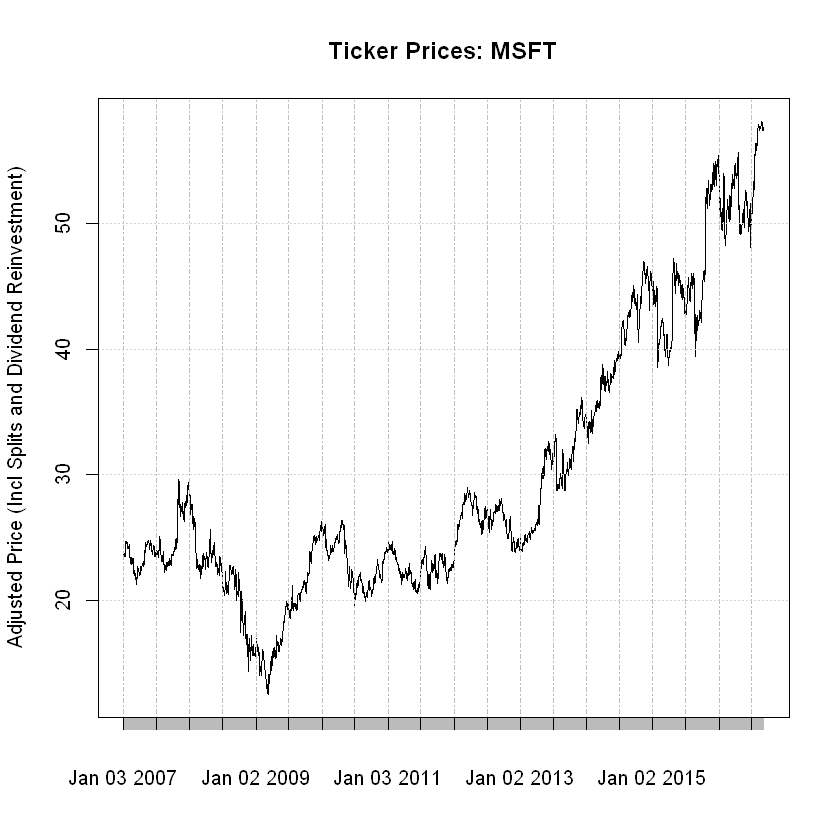

In [70]:
# Plot Prices
plot(security$Adjusted, main = paste0("Ticker Prices: ", ticker), 
     ylab = "Adjusted Price (Incl Splits and Dividend Reinvestment)")

### Set up returns with given daily lag

In [71]:
tail(security$Adjusted)
# 2016-09-07     41.63000
# 2016-09-08     41.37000

 # 41.37000 - 41.63000 # Manual Check
 # [1] -0.26

           Adjusted
2016-08-31    57.46
2016-09-01    57.59
2016-09-02    57.67
2016-09-06    57.61
2016-09-07    57.66
2016-09-08    57.43

In [72]:
tail(diff(security$Adjusted, lag = lagVal))
# 2016-09-07     0.160000
# 2016-09-08    -0.260002 # Matches above

           Adjusted
2016-08-31 16.75628
2016-09-01 15.38739
2016-09-02 15.33113
2016-09-06 16.13737
2016-09-07 14.94154
2016-09-08 15.50965

In [73]:
tail(lag(security$Adjusted, k = -lagVal))
# 2016-09-07     41.37000
# 2016-09-08           NA

           Adjusted
2016-08-31       NA
2016-09-01       NA
2016-09-02       NA
2016-09-06       NA
2016-09-07       NA
2016-09-08       NA

In [74]:
# Simple Returns
simpleRet <- diff(security$Adjusted, lag = lagVal)/lag(security$Adjusted, k = lagVal)
tail(simpleRet)
# 2016-09-08 -0.0062455439

# (41.37000/41.63000)-1
# [1] -0.006245496 # Check Value

            Adjusted
2016-08-31 0.4116647
2016-09-01 0.3646075
2016-09-02 0.3621052
2016-09-06 0.3891089
2016-09-07 0.3497677
2016-09-08 0.3699790

In [75]:
# Log Returns
logRet <- log(1 + diff(security$Adjusted, lag = lagVal)/lag(security$Adjusted, k = lagVal))
tail(logRet)
# 2016-09-08 -0.0062651289

            Adjusted
2016-08-31 0.3447696
2016-09-01 0.3108669
2016-09-02 0.3090314
2016-09-06 0.3286625
2016-09-07 0.2999325
2016-09-08 0.3147954

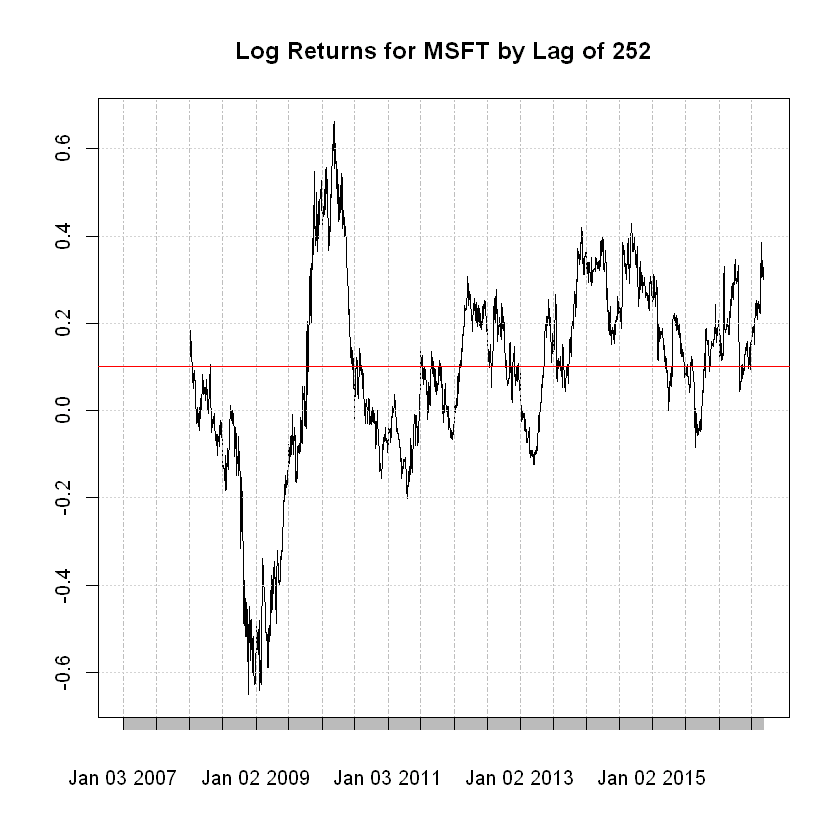

In [76]:
# Simple Log plot
plot(logRet, main = paste0("Log Returns for ",ticker," by Lag of ",lagVal))
abline(h = median(logRet, na.rm = T), col = "red")

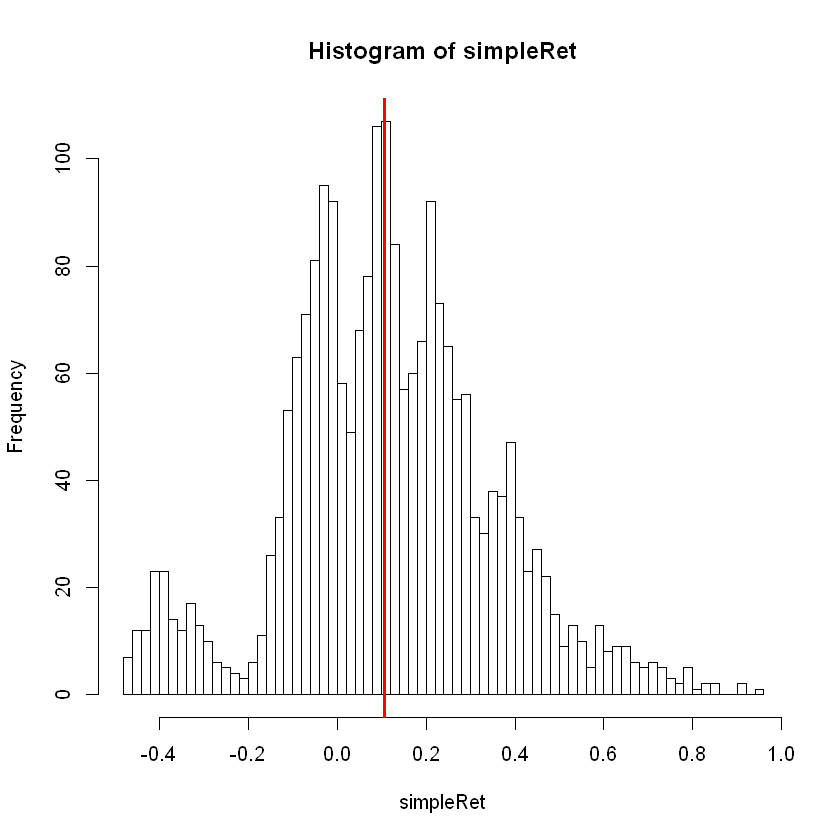

In [77]:
hist(simpleRet, breaks = 100) # Usually skewed to the right
abline(v = median(simpleRet, na.rm = T), col = "red", lwd = 3) # Median Simple Return

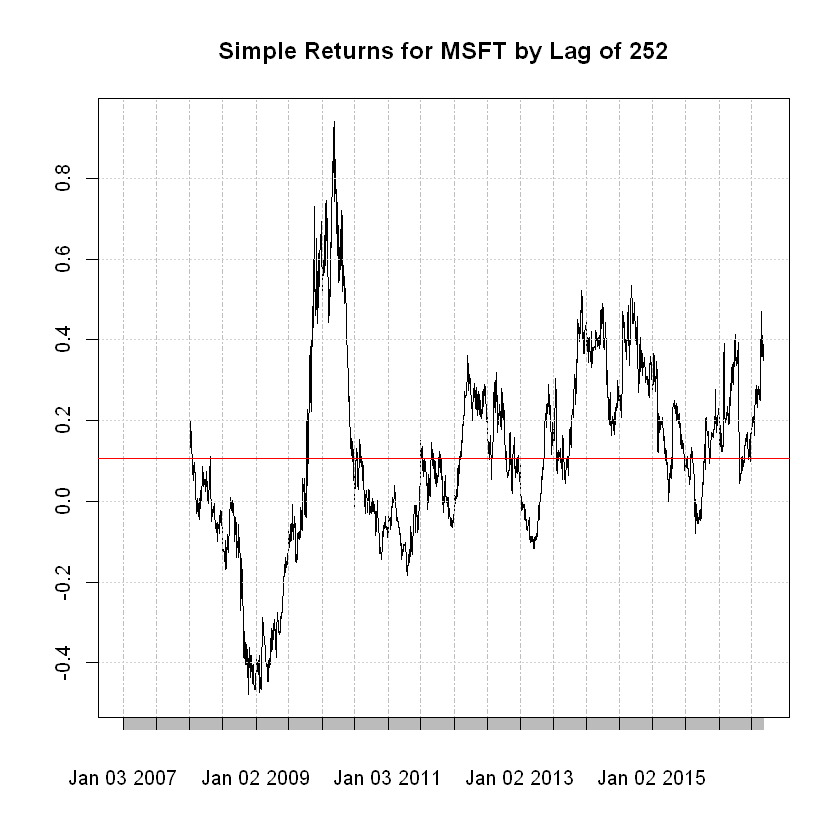

In [78]:
# Simple Returns plot
plot(simpleRet, main = paste0("Simple Returns for ",ticker," by Lag of ",lagVal))
abline(h = median(simpleRet, na.rm = T), col = "red")

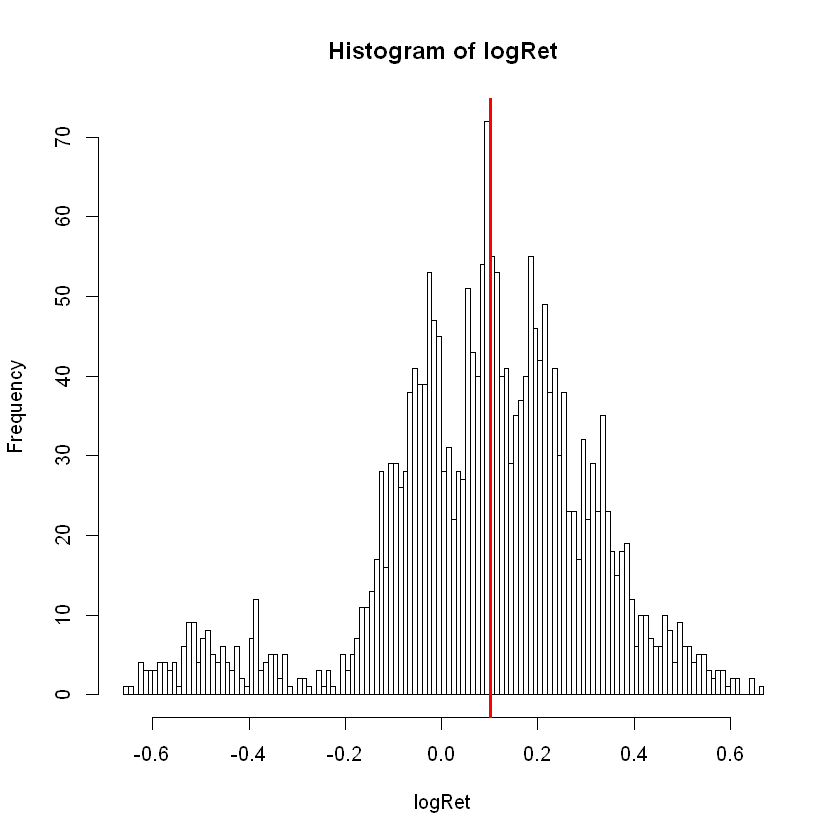

In [79]:
hist(logRet, breaks = 100) # Closer to Normal Distribution
abline(v = median(logRet, na.rm = T), col = "red", lwd = 3) # Median Log Return